## Model development

Try different models like LSTM, GRU, Transformers

Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, GRU, BatchNormalization, Bidirectional
from sklearn.preprocessing import StandardScaler

In [ ]:
stock = "amazon"

In [ ]:
df = pd.read_csv("/content/amazon.csv")
scaler = StandardScaler()

data = df[[ 'Open', 'Close', 'High', 'Low', 'Volume', 'normalized']].values

split = int(0.95*len(data))
train_data = data[:split]
test_data = data[split:]

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

train_data.shape,test_data.shape

((1471, 6), (78, 6))

In [ ]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])

    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

X_train.shape, y_train.shape

((1461, 10, 6), (1461,))

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=1024, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=512, return_sequences=True)),
    Dropout(0.1),
    LSTM(units=256, return_sequences=True),
    Dropout(0.1),
    Bidirectional(LSTM(units=128, return_sequences=False)),
    Dense(units=512, activation='relu'),
    Dense(units=256, activation='tanh'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 10, 1024)            │       4,222,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_38 (Bidirectional)     │ (None, 10, 1024)            │       6,295,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_80 (LSTM)                       │ (None, 10, 256)             │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_39 (Bidirectional)     │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,503,937 (47.70 MB)

 Trainable params: 12,503,937 (47.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.2832 - val_loss: 0.9651
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0314 - val_loss: 0.1131
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0259 - val_loss: 0.1102
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0268 - val_loss: 0.5100
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0179 - val_loss: 0.0558
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0103 - val_loss: 0.0676
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0134 - val_loss: 0.0268
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - val_loss: 0.3300
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0287 - val_loss: 0.0573
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0121 - val_loss: 0.1686
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0120 - val_loss: 0.0888
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0

In [ ]:
predicted_prices = model.predict(X_train)

def inverse_transform(scaled_data, scaler):
    dummy = np.zeros((len(scaled_data), 6))
    dummy[:, 0] = scaled_data.flatten()
    return scaler.inverse_transform(dummy)[:, 0]

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [ ]:
actual_prices = inverse_transform(y_train, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

actual_prices.shape, predicted_prices.shape

((1461,), (1461,))

In [ ]:
test_data.shape

(78, 6)

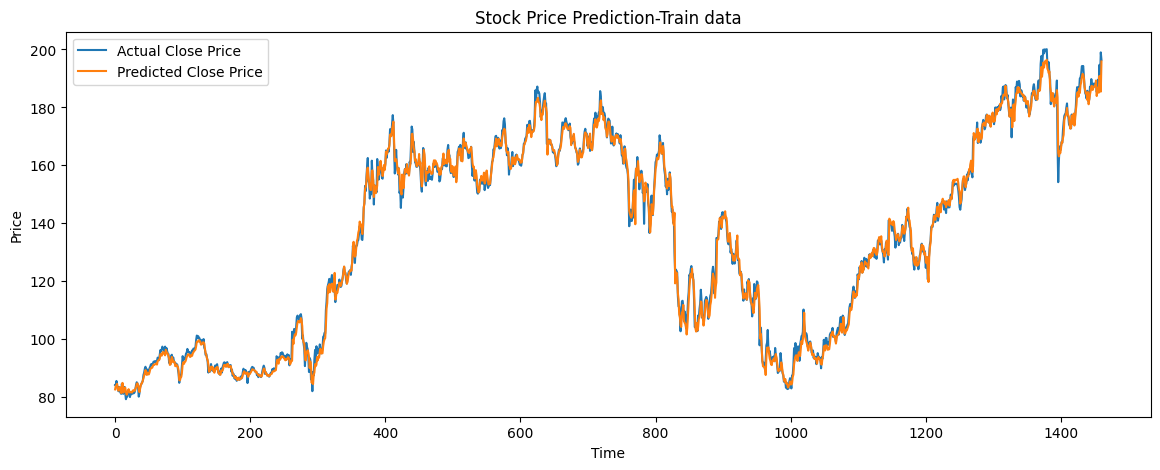

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Train data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


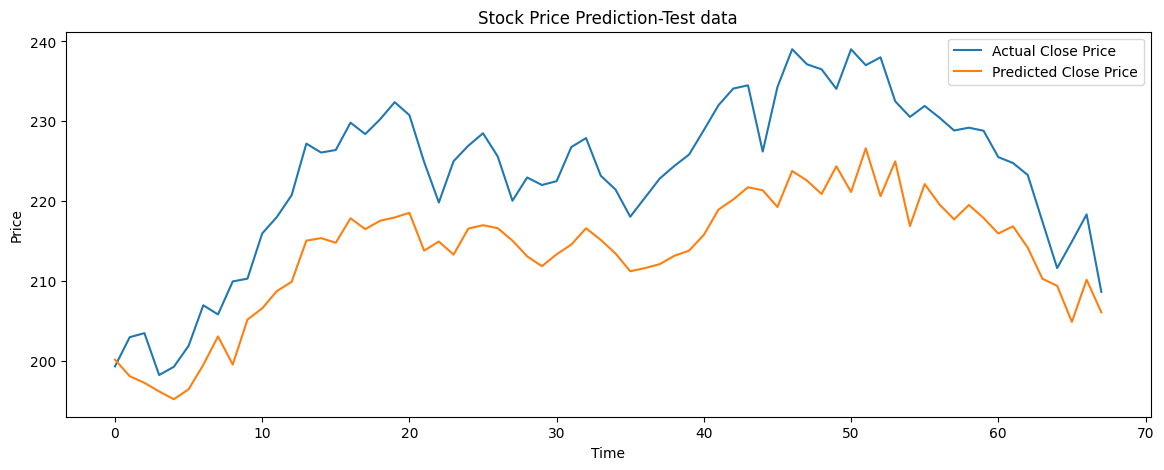

In [ ]:
predicted_prices = model.predict(X_test)

actual_prices = inverse_transform(y_test, scaler)
predicted_prices = inverse_transform(predicted_prices, scaler)

plt.figure(figsize=(14,5))
plt.plot(actual_prices, label='Actual Close Price')
plt.plot(predicted_prices, label='Predicted Close Price')
plt.title('Stock Price Prediction-Test data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_absolute_percentage_error(actual_prices, predicted_prices)
print(mse)

0.04304250819190713


In [ ]:
import joblib

joblib.dump(scaler, f"{stock}_scaler.pkl")

model.save(f"{stock}_model.keras")

### Insights

The predicted price is not close to the original price and pattern looks more smooth does't learned the complex pattern.